<a href="https://colab.research.google.com/github/rohitpaul09/Web-Scraping-Data-Sciecne-Job-Listings-Python-EDA/blob/main/Web_Scraping_Job_Listings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Name: Web Scraping Data Science Job Listings**

##### **Project Type**    - EDA
##### **Contribution**    - Individual

## **Project Summary:**

 The primary objective was to create a smart tool to simplify the process of finding data science jobs. This involved web scraping job listings from the TimesJobs website, extracting key details, and presenting insights with visuals. The overall goal was to assist individuals in navigating the data science job market and keeping professionals, job seekers, and recruiters informed about industry changes.

The journey began with web scraping, where the code was designed to extract relevant information from job listings, including job title, company, skills required, posting time, location, and salary. The extracted data was organized into a DataFrame using the pandas library, providing a structured format for analysis.

Several visualizations were then created to offer insights into different aspects of the data science job market:

1. **WordCloud for In-Demand Skills:**
   - Objective: Visualize the most wanted skills.
   - Findings: Python, SQL, Machine Learning, and Data Mining were among the most sought-after skills.

2. **Top Cities with Most Job Openings:**
   - Objective: Visualize job distribution across cities.
   - Findings: Delhi had the highest number of job openings, followed by Bengaluru/ Bangalore, Pune, Mumbai, Hyderabad/Secunderabad and Ahmedabad.

3. **Comparison of Full-Time Jobs and Internships:**
   - Objective: Compare the number of full-time jobs with internships.
   - Findings: Analyzing the job market revealed that around 88.0% of the opportunities are full-time positions, indicating a predominant demand for full-time roles in the data science field. The remaining 12.0% consists of internship opportunities.

4. **Top Companies Providing Internship Opportunities:**
   - Objective: Visualize the count of internship opportunities by company.
   - Findings: Maxgen Technologies emerged as the top company providing internship opportunities.

5. **Comparison of Work from Home vs. On-Site Opportunities:**
   - **Objective:** Compare the distribution of work-from-home and on-site job opportunities.
   - **Findings:** Analysis of the dataset indicates that 80.0% of jobs require on-site presence, while 20.0% offer work-from-home options, as illustrated in the pie chart.

6. **Top Companies Providing Work from Home Options:**
   - **Objective:** Visualize the number of work-from-home opportunities provided by different companies.
   - **Findings:** Minanshika Softech Solution Pvt Ltd leads the list of companies offering work-from-home options, closely followed by Soumya Gayen.

7. **Salary Distribution Analysis:**
   - Objective: Visualize the distribution of salaries.
   - Findings: A significant portion of salary ranges centered around 0-10 Lacs per annum, denoting entry-level pay scales, with a more pronounced concentration near 50, reflecting packages designed for experienced professionals.

8. **Experience Requirements Analysis:**
   - Objective: Visualize the distribution of required experience levels.
   - Findings: In the job market, most jobs are for beginners (0-3 yrs and 0-1 yrs experience), followed by roles needing 1-3 yrs, 5-10 yrs, 4-6 yrs experience, and more.

9. **Relationship Between Salary and Experience:**
   - Objective: Visualize the relationship between salary and experience.
   - Findings: Identified salary clusters corresponding to different experience levels, providing insights into how salary packages (in lacs per annum) vary. A cluster between 0 to 10 indicates predominant entry-level positions, while another cluster near 50 corresponds to higher salary packages for experienced professionals.

In summary, the project developed a valuable tool for comprehending data science job opportunities. By extracting data from the website and employing visualizations, it offered beneficial insights for professionals, job seekers, and recruiters in the dynamic field of data science. It is important to note that these insights are derived from a snapshot of data and may evolve with real-time updates.

## **GitHub Link:** https://github.com/rohitpaul09/Web-Scraping-Data-Sciecne-Job-Listings-Python-EDA

## **Problem Statement: Navigating the Data Science Job Landscape**

🚀 Unleash your creativity in crafting a solution that taps into the heartbeat of the data science job market! Envision an ingenious project that seamlessly wields cutting-edge web scraping techniques and illuminating data analysis.

🔍 Your mission? To engineer a tool that effortlessly gathers job listings from a multitude of online sources, extracting pivotal nuggets such as job descriptions, qualifications, locations, and salaries.

🧩 However, the true puzzle lies in deciphering this trove of data. Can your solution discern patterns that spotlight the most coveted skills? Are there threads connecting job types to compensation packages? How might it predict shifts in industry demand?

🎯 The core objectives of this challenge are as follows:

1. Web Scraping Mastery: Forge an adaptable and potent web scraping mechanism. Your creation should adeptly harvest data science job postings from a diverse array of online platforms. Be ready to navigate evolving website structures and process hefty data loads.

2. Data Symphony: Skillfully distill vital insights from the harvested job listings. Extract and cleanse critical information like job titles, company names, descriptions, qualifications, salaries, locations, and deadlines. Think data refinement and organization.

3. Market Wizardry: Conjure up analytical tools that conjure meaningful revelations from the gathered data. Dive into the abyss of job demand trends, geographic distribution, salary variations tied to experience and location, favored qualifications, and emerging skill demands.

4. Visual Magic: Weave a tapestry of visualization magic. Design captivating charts, graphs, and visual representations that paint a crystal-clear picture of the analyzed data. Make these visuals the compass that guides users through job market intricacies.

🌐 While the web scraping universe is yours to explore, consider these platforms as potential stomping grounds:

* LinkedIn Jobs
* Indeed
* Naukri
* Glassdoor
* AngelList
* TimesJobs


🎈 Your solution should not only decode the data science job realm but also empower professionals, job seekers, and recruiters to harness the dynamic shifts of the industry. The path is open, the challenge beckons – are you ready to embark on this exciting journey?






##**Let's Begin !**

##**Web Scraping Job Listings with BeautifulSoup and Pandas**


In [58]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

# Define the function to extract salary information
def extract_salary(job_element):
    # Extract salary information containing 'Lacs'
    salary_tags = job_element.find_all('li')
    for tag in salary_tags:
        if 'Lacs' in tag.text:
            return tag.text.strip()
    return 'Not Provided'

def scrape_jobs(pages):
    all_data = []
    experience_required_list = []

    for page in range(1, pages + 1):
        # Define the URL for each page
        url = f'https://www.timesjobs.com/candidate/job-search.html?from=submit&luceneResultSize=25&txtKeywords=data%20science&postWeek=7&searchType=personalizedSearch&actualTxtKeywords=Data%20Science&searchBy=0&rdoOperator=OR&pDate=I&sequence={page}&startPage=1'
        html_text = requests.get(url).text
        soup = BeautifulSoup(html_text, 'lxml')

        # Refining the extraction process to remove unwanted strings from the experience information
        for item in soup.find_all('ul', {'class': 'top-jd-dtl clearfix'}):
            exp_tag = item.find('li')
            if exp_tag and 'yrs' in exp_tag.text:
                # Extracting the experience text and removing any unwanted strings
                experience = exp_tag.text.replace('card_travel', '').strip()
                experience_required_list.append(experience)
            else:
                experience_required_list.append('Not Mentioned')

        # Extract job listings
        job_listings = soup.find_all('li', class_='clearfix job-bx wht-shd-bx')

        for job in job_listings:
            skills = job.find('span', class_='srp-skills').text.strip().replace(' ', '').replace('\r', '').replace('\n', '').replace('.', 'Not Provided')
            location_element = job.find('ul', class_='top-jd-dtl clearfix')
            location = location_element.find('span').text.strip() if location_element else 'Not Provided'
            posted_ago = job.find('span', class_='sim-posted').span.text.strip().replace('\r', '').replace('Posted ', '').replace('\t', '').replace('\n', '')
            company_name = job.find('h3', class_='joblist-comp-name').text.strip().replace('\r\n', '').replace(' (More Jobs)', '')

            # Create a dictionary for job data
            job_data = {
                'Job Title': job.find('h2').text.strip(),
                'Company': company_name,
                'Skills Required': skills,
                'Job Posted Ago': posted_ago,
                'Location': location,
                'Salary': extract_salary(job)
            }
            # Append the job data to the list
            all_data.append(job_data)

    # Create a DataFrame from the collected job data
    df = pd.DataFrame(all_data)
    # Add the 'Experience Required' column to the DataFrame
    df['Experience Required'] = experience_required_list

    return df

# Scrape the first 2 pages of job listings
df = scrape_jobs(2)


In [2]:
# Display the head of the DataFrame with data from multiple pages
print('Scraped Data from Multiple Pages:')
df.head(10)


Scraped Data from Multiple Pages:


,Job Title,Company,Skills Required,Job Posted Ago,Location,Salary,Experience Required
0,Data Science,innefu labs pvt. ltd.,"procedures,datacollection,Commercialactivities",few days ago,"Delhi, Delhi/NCR",Not Provided,4 - 6 yrs
1,Data Science Internship in Ahmedabad,Maxgen Technologies,"studentproject,datascience",few days ago,"Ahmedabad, Mehsana, Rajkot, Surat, Surendr...",Not Provided,0 - 1 yrs
2,Data Science Internship in Mumbai,Maxgen Technologies,Not Provided,5 days ago,"Mumbai, Kalyan, Nasik, Navi Mumbai, Thane",Not Provided,0 - 1 yrs
3,Data Science Internship in Pune,Maxgen Technologies,Not Provided,few days ago,"Pune, Jalgaon, Kolhapur, Nagpur, Solapur",₹Rs 1.00 - 2.00 Lacs p.a.,0 - 1 yrs
4,Director of Data Science,Deal4loans,"advancedanalytics,sas,businessrequirements,dir...",4 days ago,Noida/Greater Noida,Not Provided,5 - 8 yrs
5,Data Science Engineer,alliance recruitment agency,"anova,spss,textanalytics,sql,datascience,clust...",3 days ago,Kolkata,Not Provided,5 - 10 yrs
6,Manager - Data Science,Merilytics,"fundamentals,algorithms,python,algorithmdevelo...",5 days ago,Hyderabad/Secunderabad,Not Provided,3 - 5 yrs
7,Data Science & Analytic,CODEC Networks,"hive,algorithms,datamining,pig,sql,java,apache...",5 days ago,"Delhi, Delhi/NCR",Not Provided,1 - 2 yrs
8,Data Science Engineer,alliance recruitment agency,"hive,algorithms,datamining,machinelearning,sql...",3 days ago,Pune,Not Provided,2 - 10 yrs
9,Co-Founder / Head of Data Sciences,NLP People,"datamining,machinelearning,artificialintelligence",few days ago,Delhi,Not Provided,0 - 3 yrs


##**Visualizing In-Demand Skills with WordCloud**

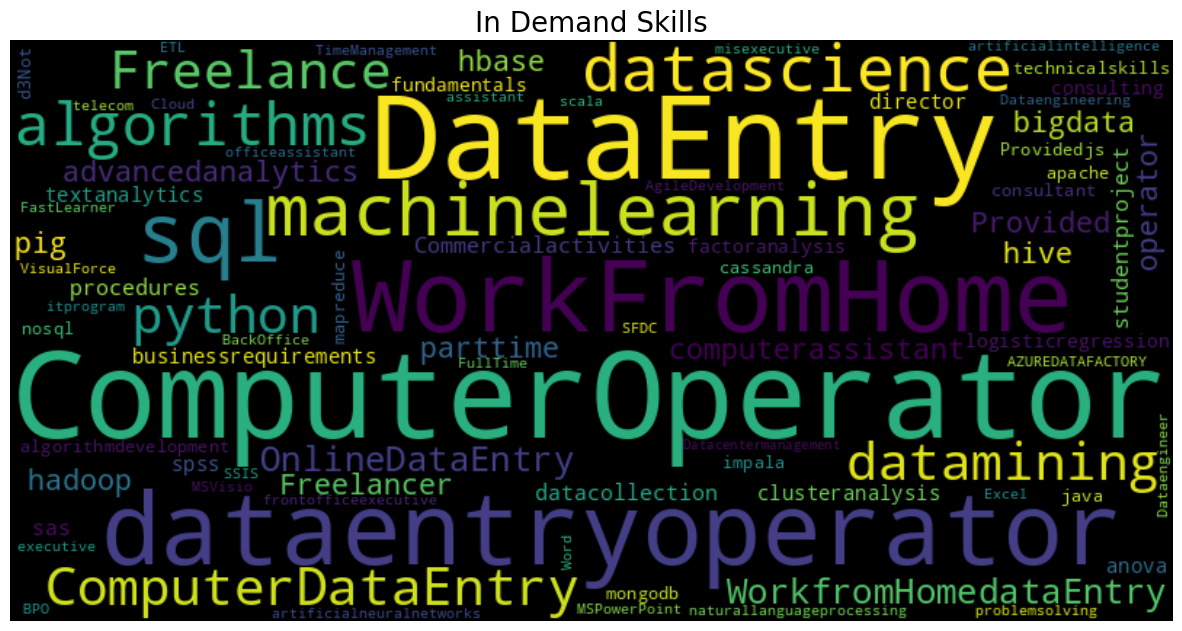

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all the 'Skills Required' values into a single text
text3 = ' '.join(df['Skills Required'])

# Generate the WordCloud object
wordcloud2 = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(text3)

# Display the generated WordCloud to visualize the skills in demand
plt.figure(figsize=(15, 15))

# Add a header
plt.title("In Demand Skills", fontsize=20)

# Show the WordCloud
plt.imshow(wordcloud2, interpolation="bilinear")

# Turn off axis labels for better visualization
plt.axis("off")

# Show the plot
plt.show()


##**Top 6 Cities with the Most Job Openings in Data Science**

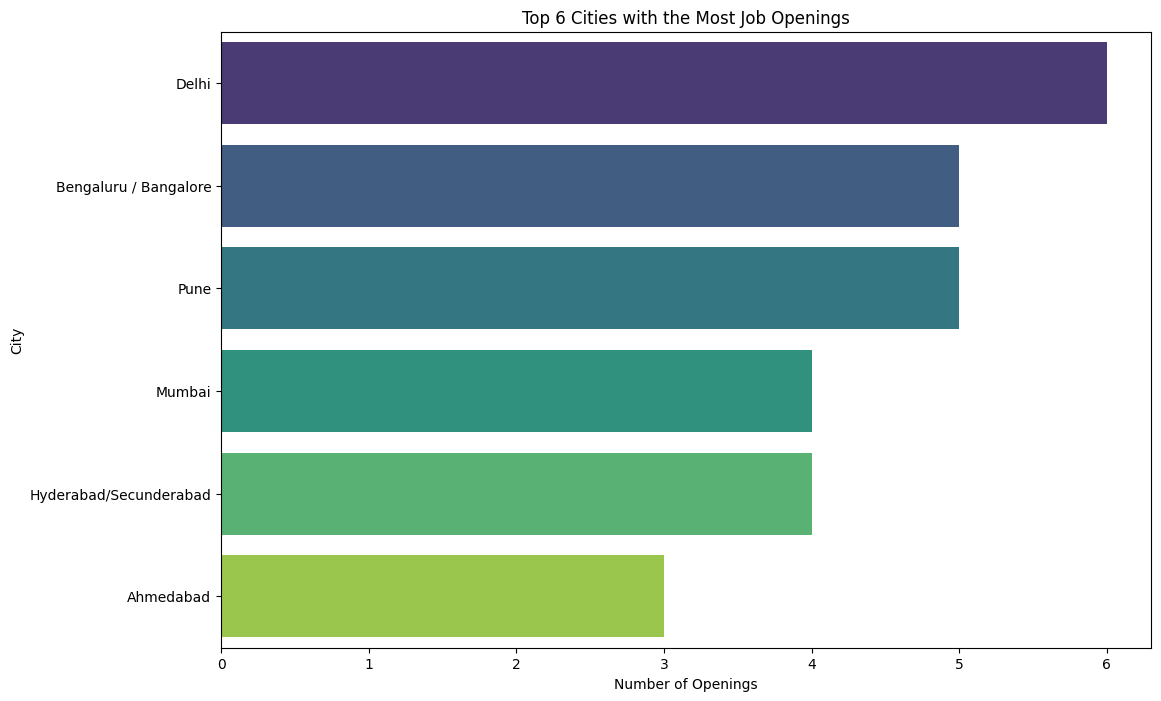

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Split the multiple city names in each row
cities = df['Location'].apply(lambda x: x if pd.isnull(x) else x.split(','))

# Flatten the list of cities
flat_cities = [city.strip() for sublist in cities.dropna() for city in sublist]

# Create a DataFrame to count occurrences of each city
city_counts = pd.Series(flat_cities).value_counts().reset_index()
city_counts.columns = ['City', 'Count']

# Filter for the top 6 cities
top_6_cities = city_counts.head(6)

# Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='City', data=top_6_cities, palette='viridis')

# Set labels and title
plt.xlabel('Number of Openings')
plt.ylabel('City')
plt.title('Top 6 Cities with the Most Job Openings')

# Show the plot
plt.show()


##**Comparison of Full-Time Jobs and Internships in the Job Market**

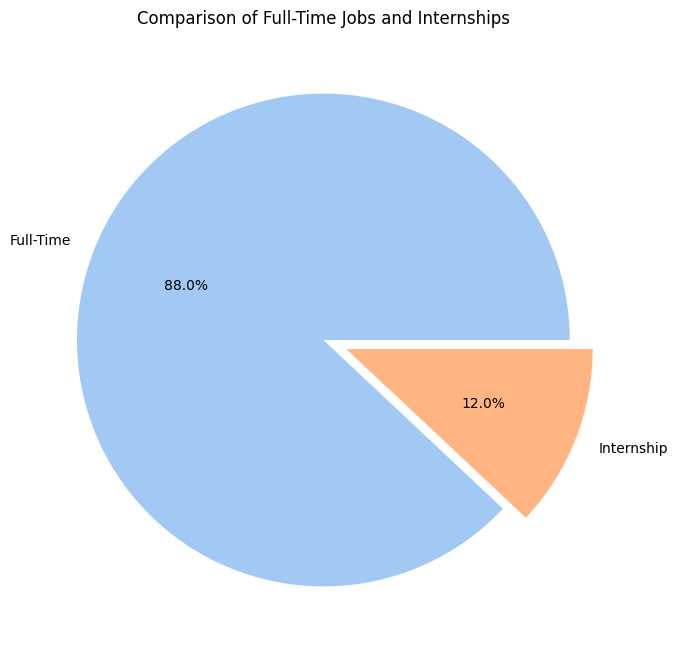

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of 'Internship' in the 'Job Title' column
df['Internship'] = df['Job Title'].apply(lambda x: 'Internship' in x)

# Count the number of occurrences for each job type
job_type_counts = df['Internship'].value_counts()

# Plot the comparison between full-time jobs and internships using a pie chart with explode
explode = (0, 0.1)  # Explode the second slice (Internship) by 10%

plt.figure(figsize=(8, 8))
plt.pie(job_type_counts, labels=['Full-Time', 'Internship'], autopct='%1.1f%%', explode=explode, colors=sns.color_palette('pastel'))
plt.title('Comparison of Full-Time Jobs and Internships')

# Show the plot
plt.show()


##**Top Companies Providing Internship Opportunities in the Job Market**

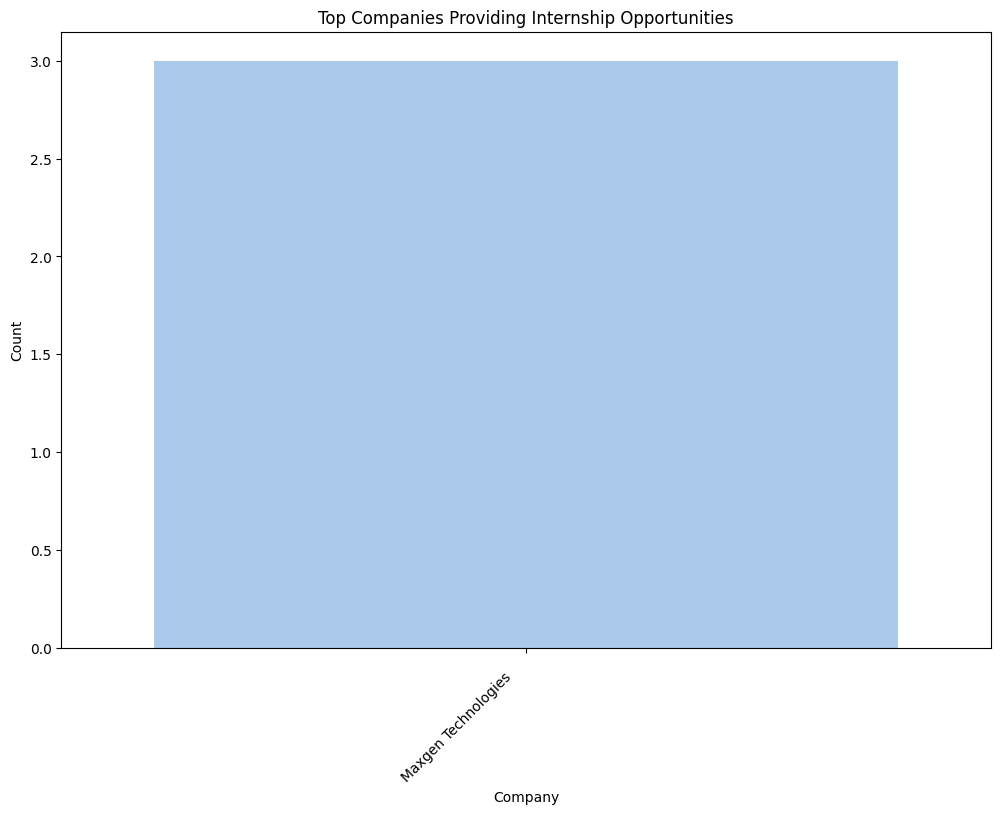

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of 'Internship' in the 'Job Title' column
df['Internship'] = df['Job Title'].apply(lambda x: 'Internship' in x)

# Filter DataFrame for internship opportunities
df_internship = df[df['Internship']]

# Count the occurrences of each company providing internships
company_counts_internship = df_internship['Company'].value_counts()

# Plot the count of internship opportunities by company
plt.figure(figsize=(12, 8))
sns.barplot(x=company_counts_internship.index, y=company_counts_internship, palette='pastel')

# Set labels and title
plt.xlabel('Company')
plt.ylabel('Count')
plt.title('Top Companies Providing Internship Opportunities')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


##**Comparison of Work from Home vs On Site Job Opportunities in the Job Market**

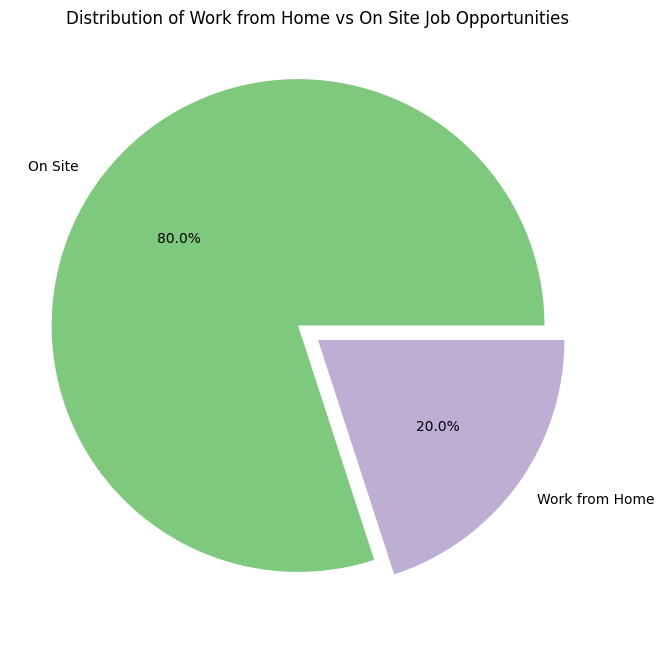

In [28]:
# Count the occurrences of 'Work from Home' and 'On Site' job opportunities
job_type_counts = df['Job Type'].value_counts()

# Create a pie chart with explode
explode = (0.1, 0)  # Explode the first slice (Work from Home)
plt.figure(figsize=(8, 8))
plt.pie(job_type_counts, labels=job_type_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Accent'), explode=explode)

# Set title
plt.title('Distribution of Work from Home vs On Site Job Opportunities')

# Show the plot
plt.show()


##**Top Companies Providing Work from Home Options in the Job Market**

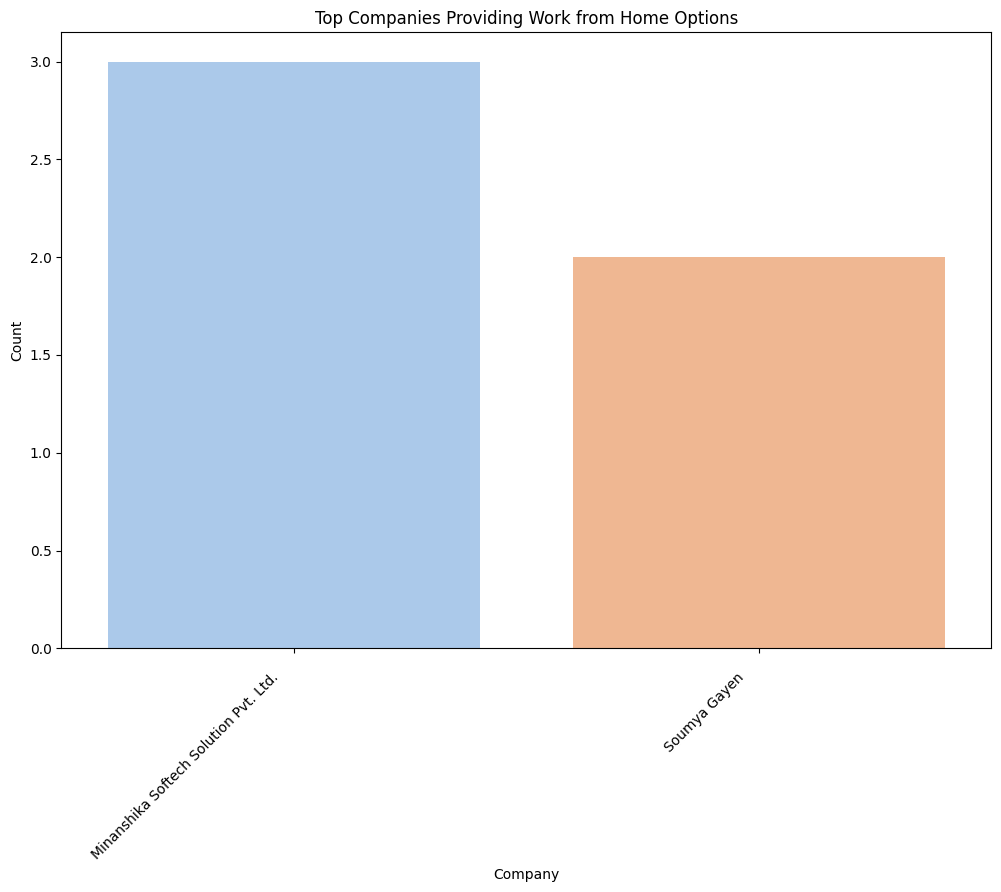

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column 'Job Wfh' based on the values in 'Job Posted Ago'
df['Job Wfh'] = df['Job Posted Ago'].apply(lambda x: 'Work from Home' if x == 'Work from Home' else 'On Site')

# Filter DataFrame for 'Work from Home' opportunities
df_work_from_home = df[df['Job Wfh'] == 'Work from Home']

# Count the occurrences of each company providing 'Work from Home' opportunities
company_counts = df_work_from_home['Company'].value_counts()

# Plot the count of 'Work from Home' opportunities by company
plt.figure(figsize=(12, 8))
sns.barplot(x=company_counts.index, y=company_counts, palette='pastel')

# Set labels and title
plt.xlabel('Company')
plt.ylabel('Count')
plt.title('Top Companies Providing Work from Home Options')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


##**Analyzing Salary Distribution in the Job Market**

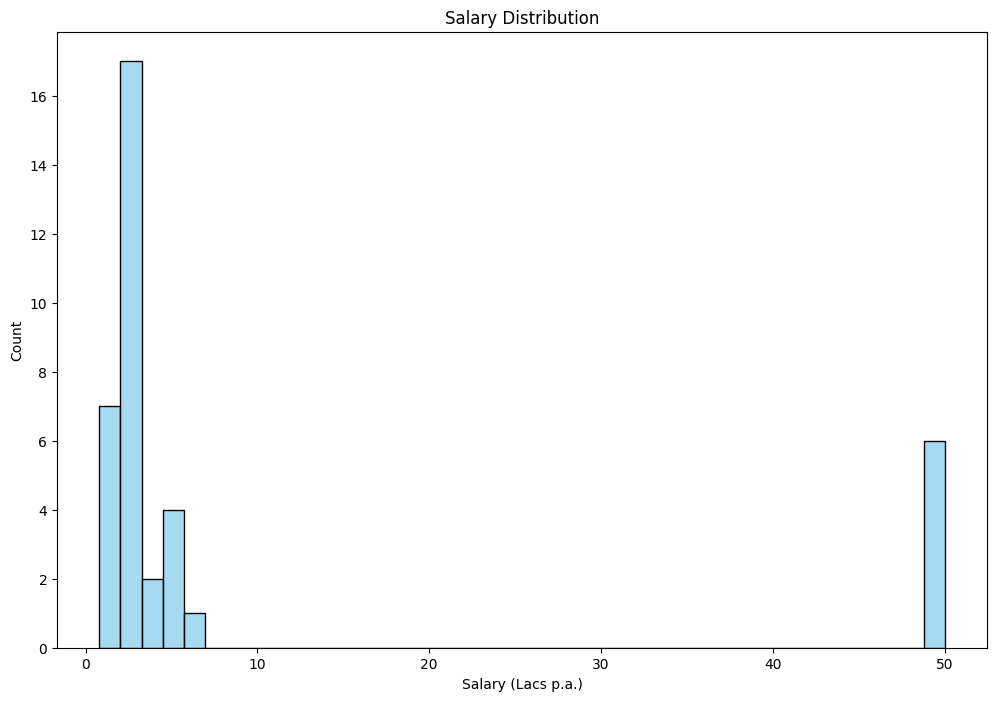

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Remove 'Not Provided' entries from the 'Salary' column
df_salary = df[df['Salary'] != 'Not Provided'].copy()

# Extract salary values from the strings
df_salary['Salary'] = df_salary['Salary'].str.extract(r'([\d.,]+)')

# Convert the 'Salary' values to a numeric format for plotting
df_salary['Salary'] = df_salary['Salary'].astype(float)

# Create a histogram
plt.figure(figsize=(12, 8))
sns.histplot(df_salary['Salary'], bins=40, kde=False, color='skyblue')
plt.title('Salary Distribution')
plt.xlabel('Salary (Lacs p.a.)')
plt.ylabel('Count')

# Show the plot
plt.show()


##**Exploring Experience Requirements in the Job Market**

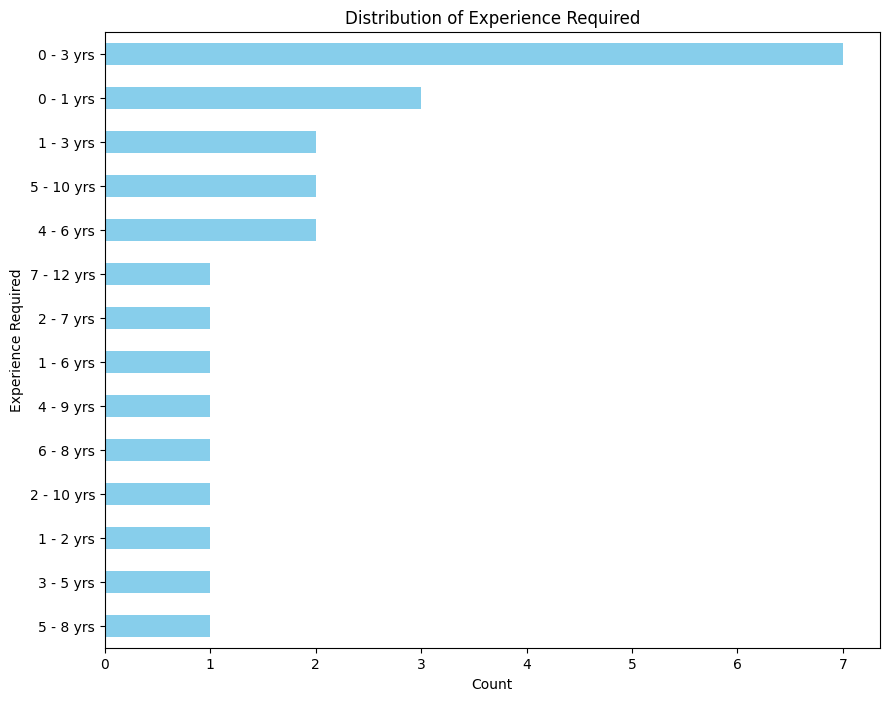

In [46]:
import matplotlib.pyplot as plt

# Count the occurrences of each experience level
experience_counts = df['Experience Required'].value_counts()

# Sort the values in ascending order for better visualization
experience_counts = experience_counts.sort_values(ascending=True)

# Create a horizontal bar chart
plt.figure(figsize=(10, 8))
experience_counts.plot(kind='barh', color='skyblue')
plt.title('Distribution of Experience Required')
plt.xlabel('Count')
plt.ylabel('Experience Required')
plt.show()


##**Analyzing the Relationship Between Salary and Experience in the Job Market**

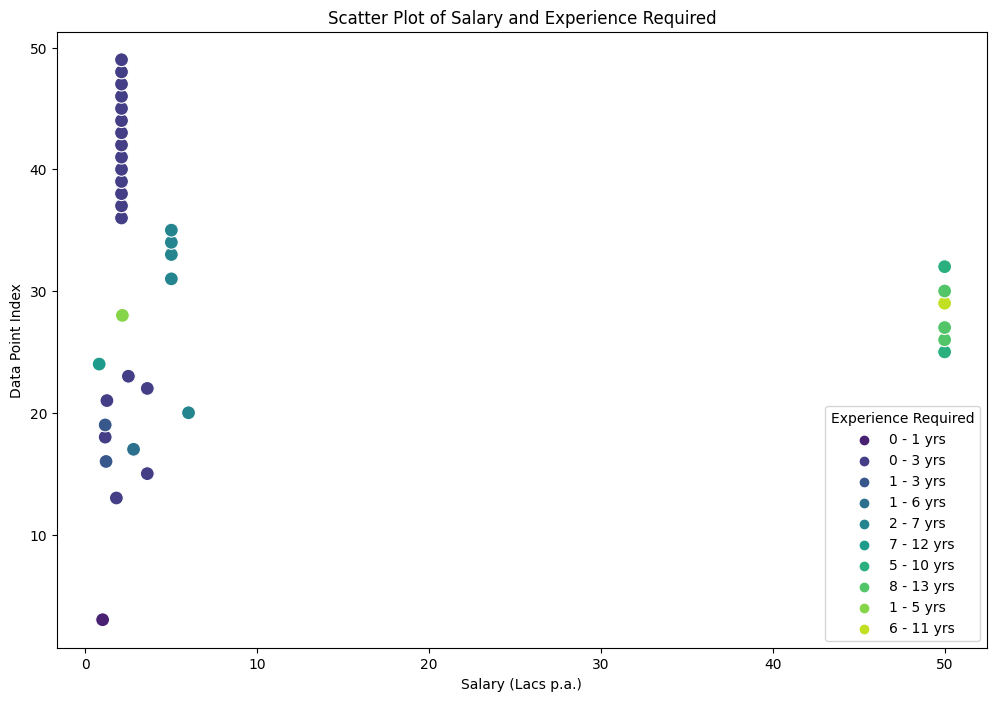

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Remove 'Not Provided' entries from the 'Salary' column
df_salary = df[df['Salary'] != 'Not Provided'].copy()

# Remove commas from the 'Salary' values and extract them
df_salary['Salary'] = df_salary['Salary'].str.replace(',', '')
df_salary['Salary'] = df_salary['Salary'].str.extract(r'([\d.]+)')

# Convert the 'Salary' values to a numeric format for plotting
df_salary['Salary'] = df_salary['Salary'].astype(float)

# Create a scatter plot with increased point size
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Salary', y=df_salary.index, hue='Experience Required', data=df_salary, palette='viridis', s=100)
plt.title('Scatter Plot of Salary and Experience Required')
plt.xlabel('Salary (Lacs p.a.)')
plt.ylabel('Data Point Index')

# Show the plot
plt.show()
